In [1]:
import pandas
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
new = pandas.read_csv('new2_40.csv')
old = pandas.read_csv('old2_40.csv')

In [3]:
new = pandas.read_csv('new_many_tests.csv')
old = pandas.read_csv('old_many_tests.csv')


In [4]:
new = new.select(lambda x : new['loss'][x] < 2.5)
old = old.select(lambda x : old['loss'][x] < 2.5)

In [5]:
new = new.groupby('n').mean()
old = old.groupby('n').mean()

In [6]:
n_new = new.index#new['n'].get_values()
fm_new = new['flow_mods'].get_values()
pi_new = new['packet_ins'].get_values()
lldp_pi_new = new['lldp_packet_ins'].get_values()
po_new = new['packet_outs'].get_values()
lldp_po_new = new['lldp_packet_outs'].get_values()
fr_new = new['flow_removeds'].get_values()
loss_new = new['loss'].get_values()
time_new = new['time'].get_values()

n_old = old.index#old['n'].get_values()
fm_old = old['flow_mods'].get_values()
pi_old = old['packet_ins'].get_values()
lldp_pi_old = old['lldp_packet_ins'].get_values()
po_old = old['packet_outs'].get_values()
lldp_po_old = old['lldp_packet_outs'].get_values()
fr_old = old['flow_removeds'].get_values()
loss_old = old['loss'].get_values()
time_old = old['time'].get_values()

In [31]:
print n_new

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40],
           dtype='int64', name=u'n')


In [58]:
import numpy
log_n_new = log(n_new - 2)[1:]
log_fm_new = log(fm_new - fm_new[0] )[1:]
#tmp_n = log_n_new[1:] - log_n_new[:-1]
#tmp_fm = log_fm_new[1:] - log_fm_new[:-1]
koef = log_fm_new / log_n_new
koef = koef.get_values()
print koef
print numpy.median(koef)
k = numpy.median(koef)

[        inf  6.29155445  4.68897263  4.20751875  3.9064811   3.71566785
  3.59149195  3.46778905  3.41531224  3.34811007  3.28828078  3.25449971
  3.22573501  3.17342908  3.15990554  3.15398403  3.13722751  3.15188341
  3.14270247  3.1037436   3.12081515  3.10320143  3.08736226  3.09228057
  3.0781378   3.07788308  3.07868359  3.0566617   3.04064662  3.03077977
  3.01049588  3.05808178  3.01516021  3.02247519  2.99842994  3.00206084
  2.99132179  2.99145342]
3.12902133443


In [86]:
tmp_n = n_old.get_values() - 1
y = log(fm_old)[2:]
x = log(tmp_n)[2:]
N = len(x)

a_old = (N * sum(x * y) - sum(x) * sum(y)) / (N*sum(x * x) - sum(x) * sum(x))
b_old = (sum(y) - a_old * sum(x)) / N

print a_old, b_old

3.3952681903 2.36375178385


In [90]:
print exp(b_old)

10.6307610449


In [88]:
tmp_n = n_new.get_values() - 1
y = log(fm_new)[2:]
x = log(tmp_n)[2:]
N = len(x)

a_new = (N * sum(x * y) - sum(x) * sum(y)) / (N*sum(x * x) - sum(x) * sum(x))
b_new = (sum(y) - a_new * sum(x)) / N

print a_new, b_new

2.48928478656 1.7683366584


In [91]:
exp(b_new)

5.8610962437115415

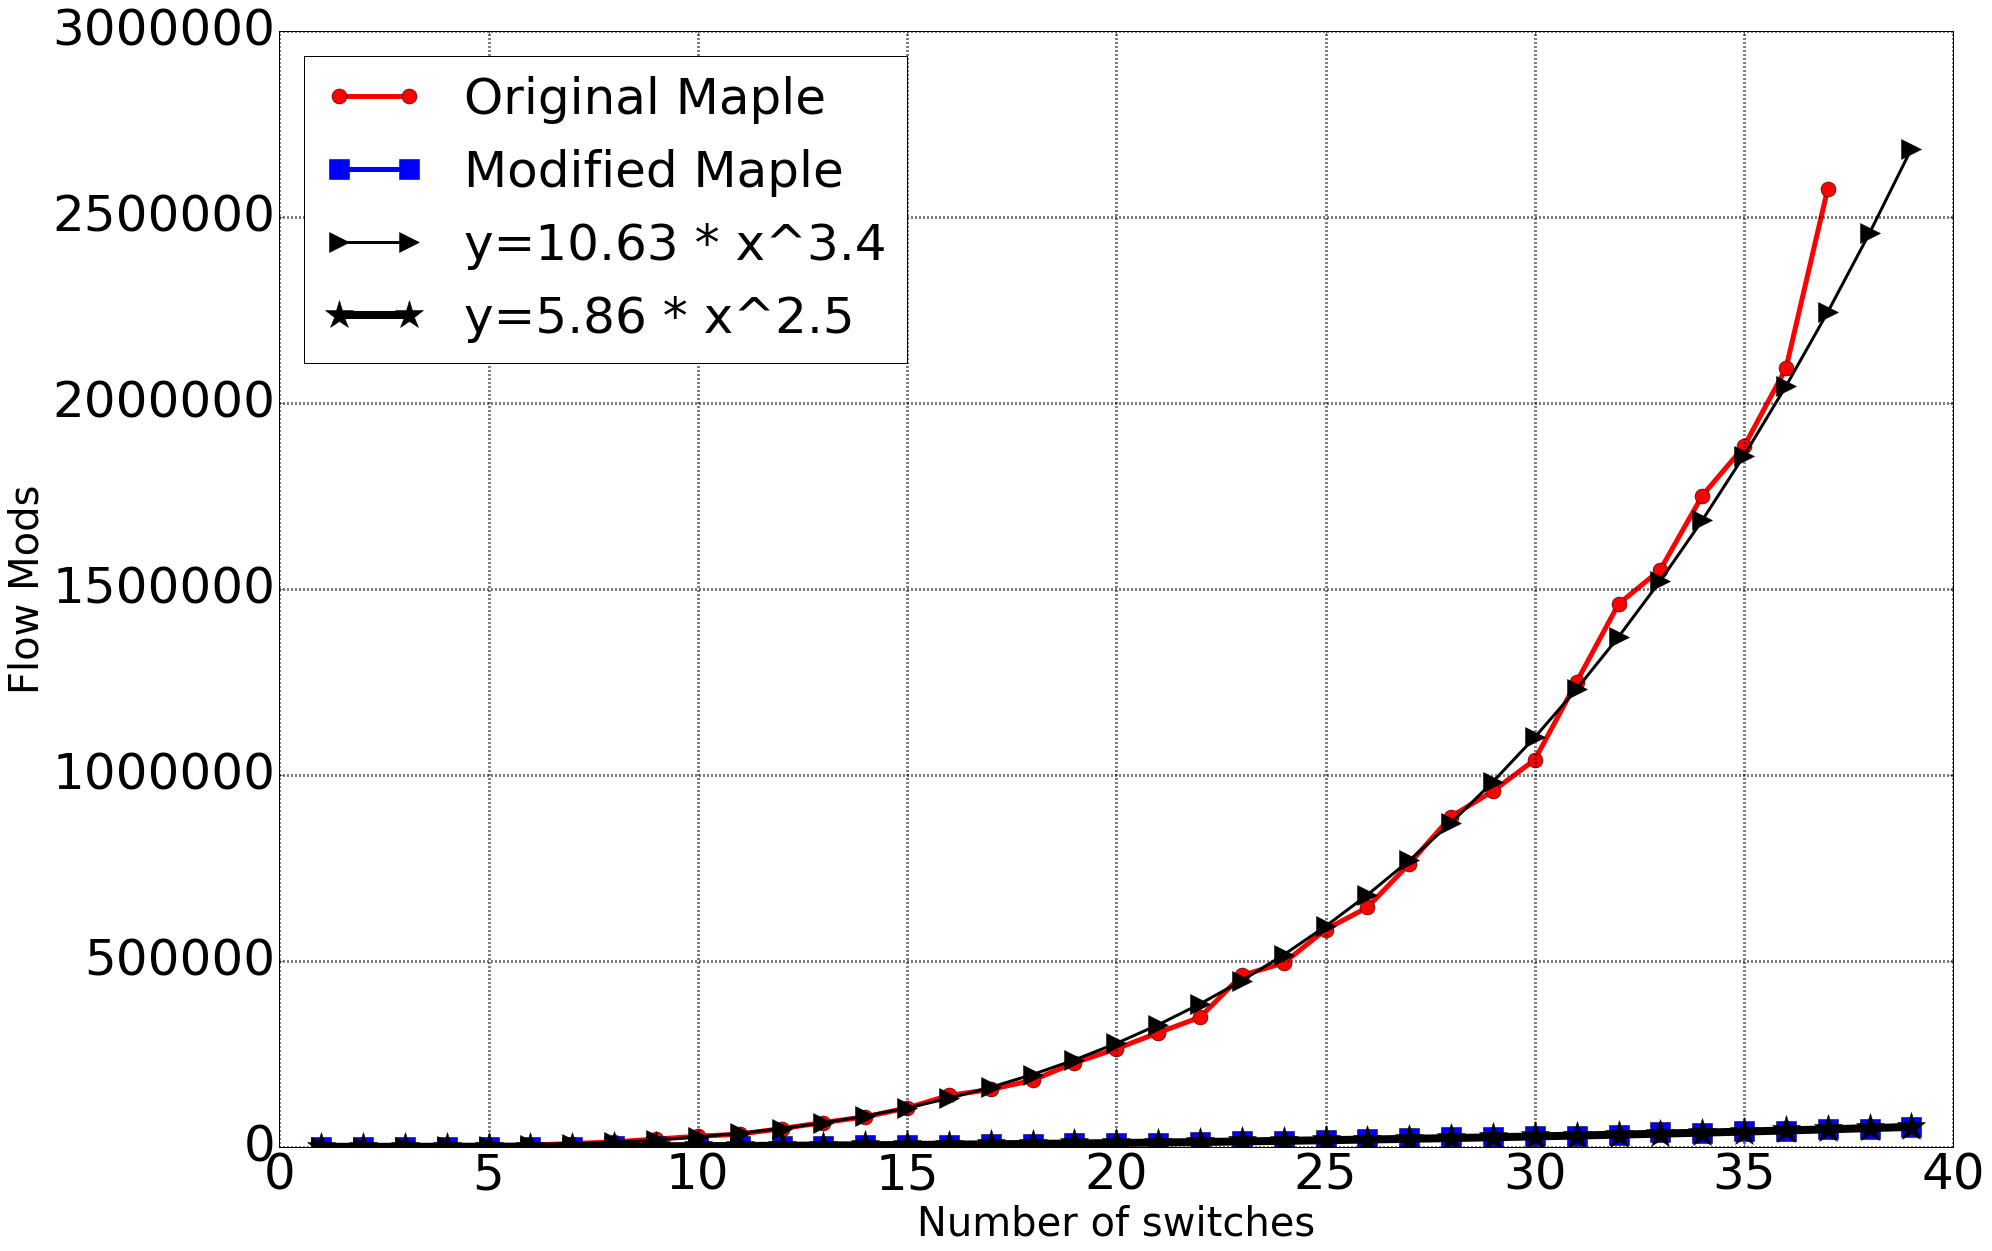

In [117]:
plt.figure(figsize=(30, 20))
plt.plot(n_old - 1, fm_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.plot(n_new - 1, fm_new, color='b', marker='s', markersize=20, label="Modified Maple",lw=5)
plt.plot( range(1, 40), [ (x**a_old)*exp(b_old) for x in range(1, 40)], label="y=10.63 * x^3.4",color='black', lw=3, marker='>', markersize=20 )
plt.plot( range(1, 40), [ (x**a_new)*exp(b_new) for x in range(1, 40)], label='y=5.86 * x^2.5',color='black', lw=8, marker='*', markersize=30 )



plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=3)
#plt.title("Flow mods messages", fontsize=40)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Flow Mods", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('appFlowMod.png')
plt.show()

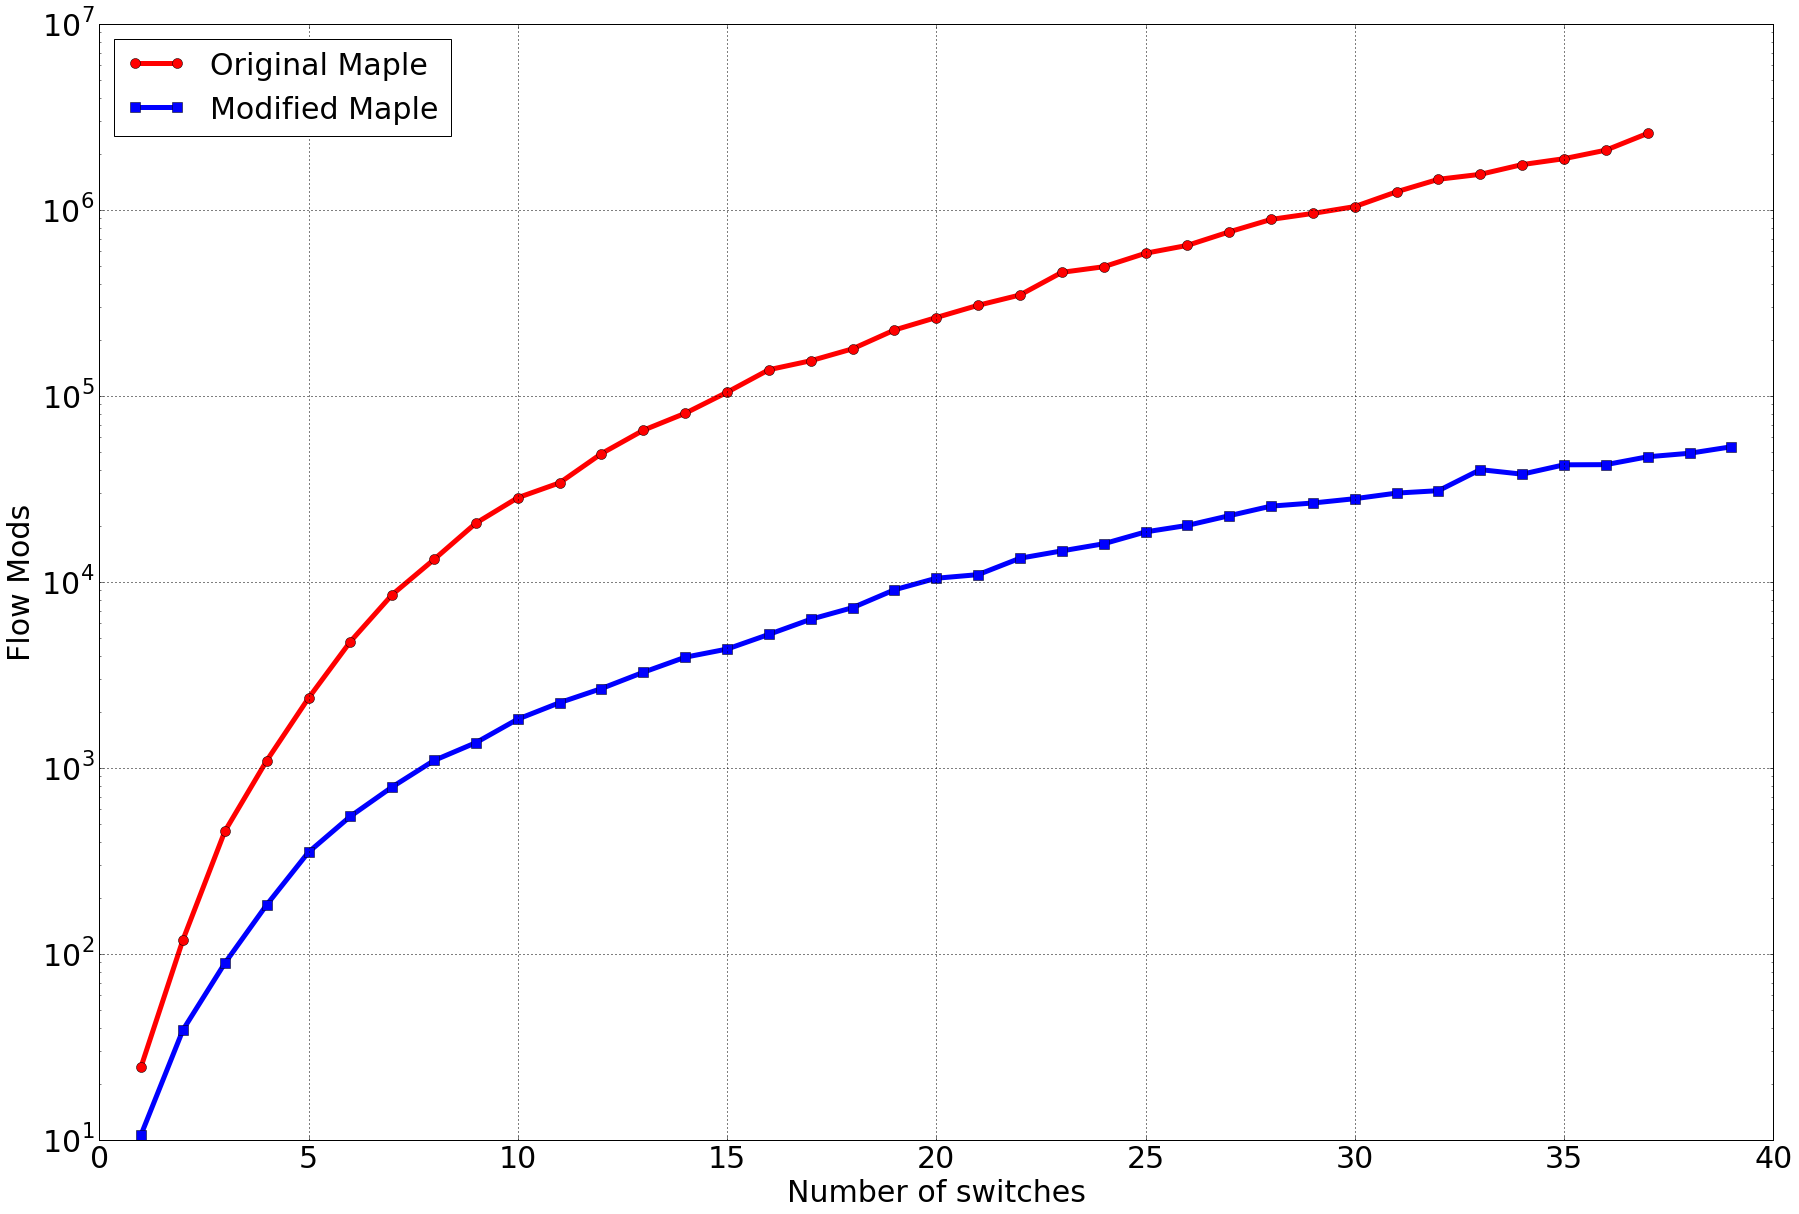

In [142]:
plt.figure(figsize=(30, 20))
plt.semilogy(n_old - 1, fm_old, color='r', marker='o', markersize=10, label="Original Maple", lw=5)
plt.semilogy(n_new - 1, fm_new, color='b', marker='s', markersize=10, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':30})
plt.grid(linewidth=1)
#plt.title("Flow mods messages", fontsize=30)
plt.xlabel("Number of switches", fontsize=30)
plt.ylabel("Flow Mods", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

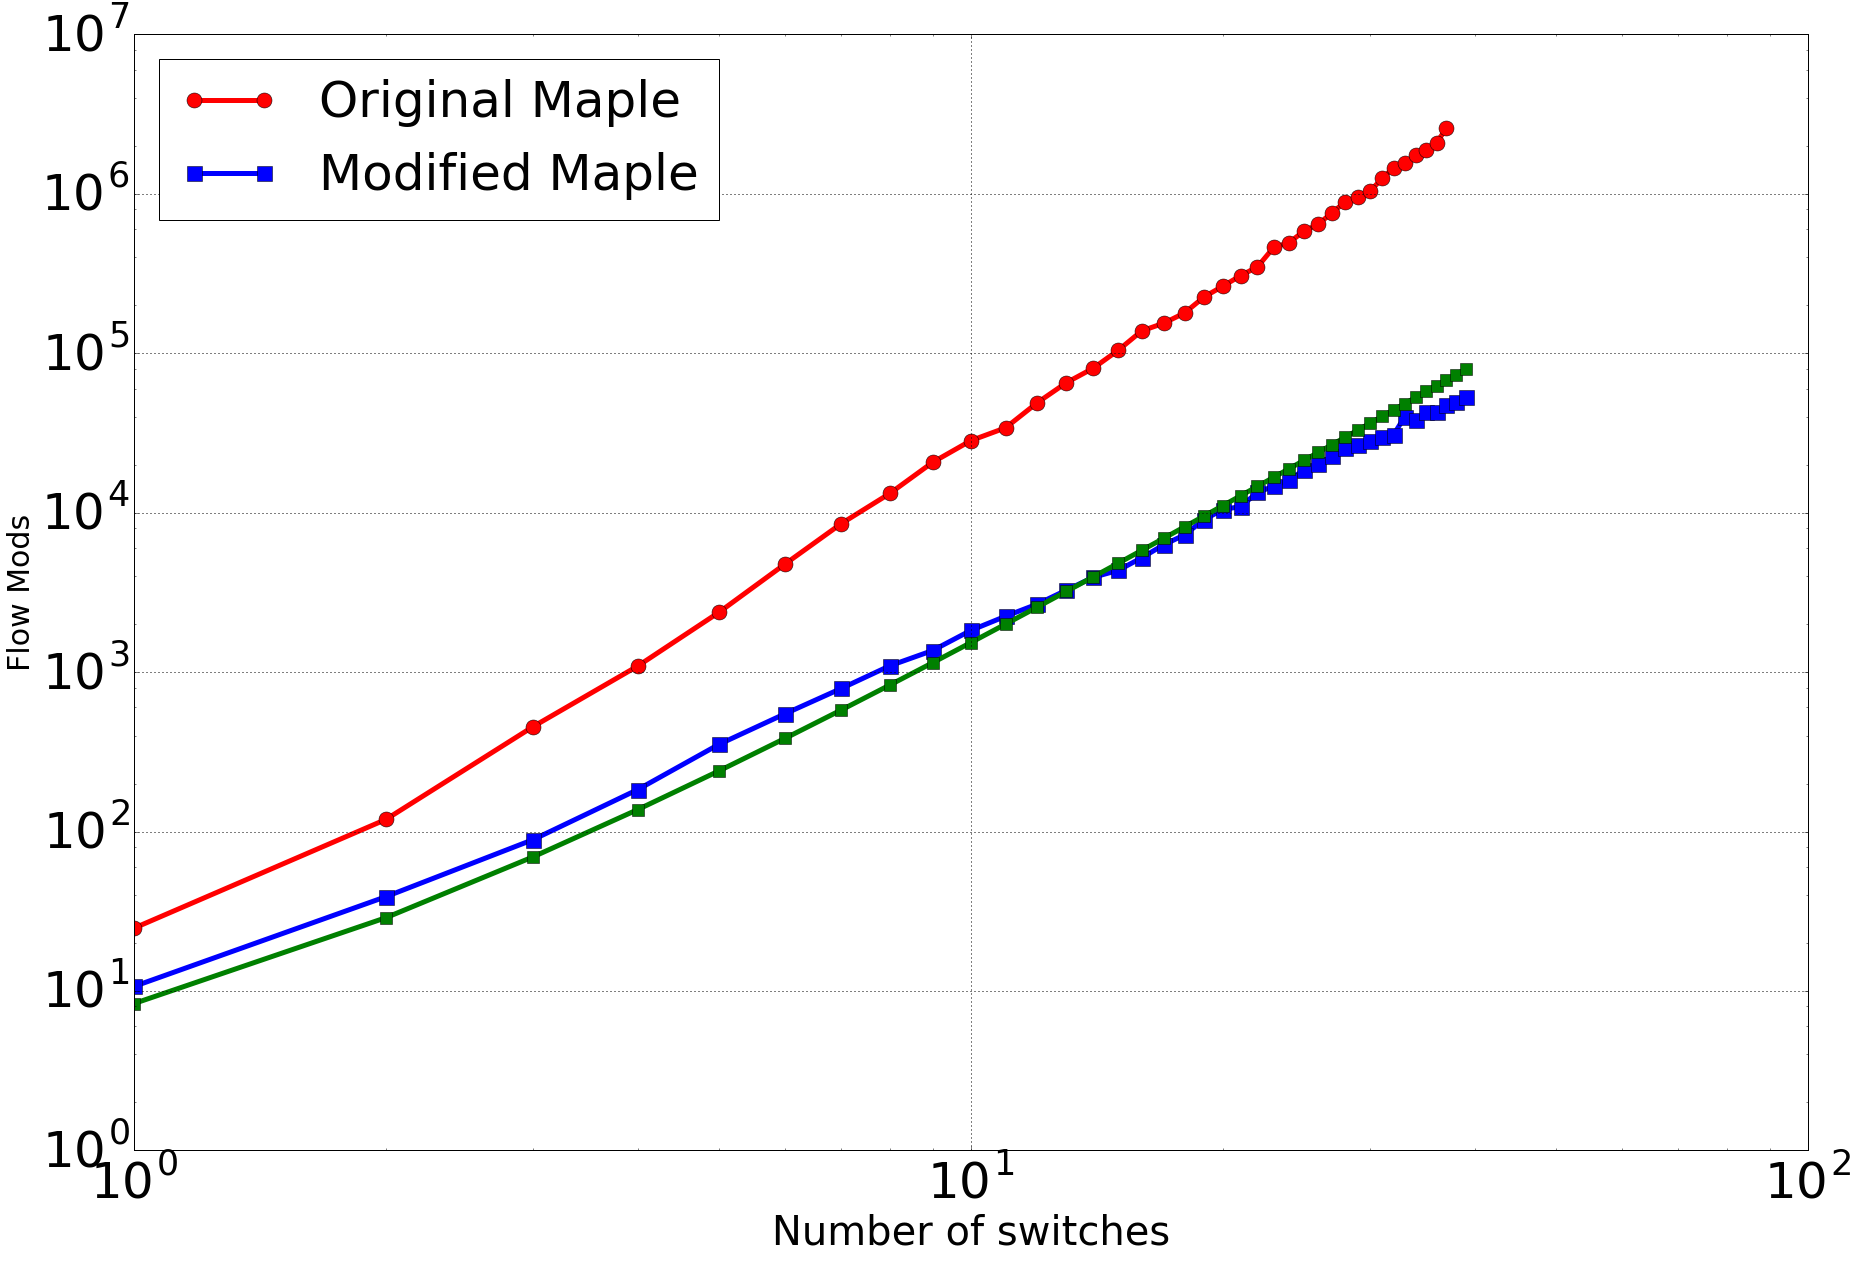

In [42]:
plt.figure(figsize=(30, 20))
plt.loglog(n_old - 1, fm_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.loglog(n_new - 1, fm_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.loglog( range(1, 40), [x ** k for x in range(2, 41)], color='g', lw=5, marker='s', markersize=12 )

plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=1)
#plt.title("Flow mods messages", fontsize=40)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Flow Mods", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('FlowModloglog.png')
plt.show()

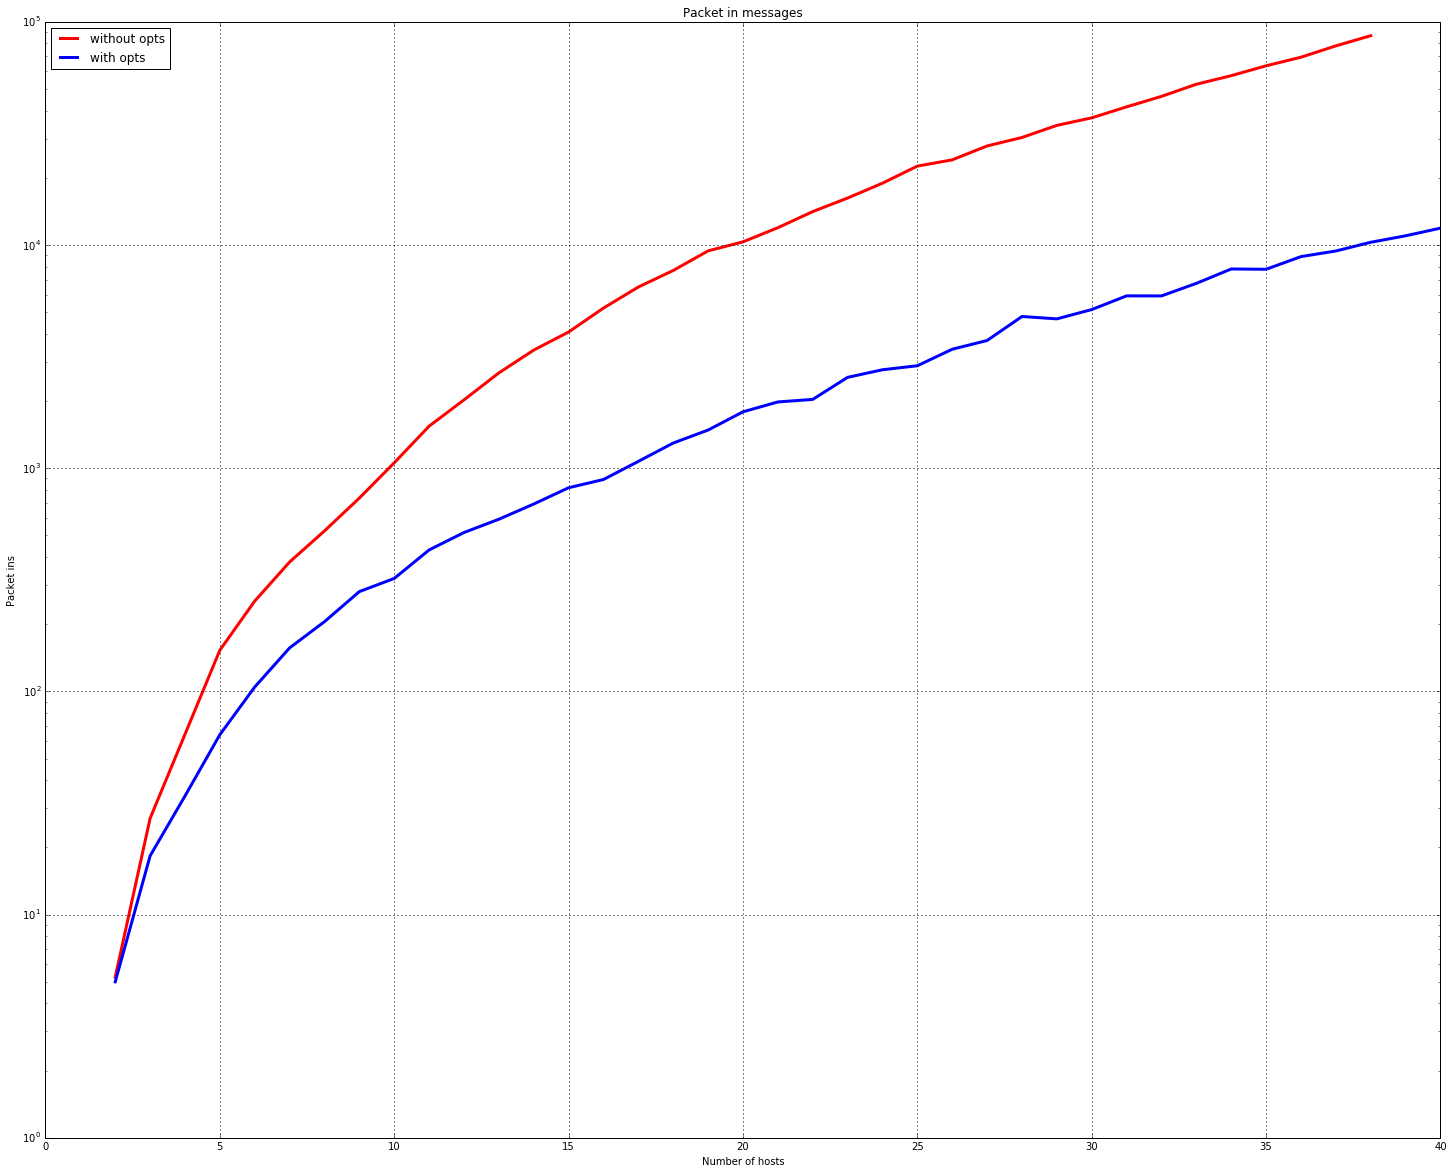

In [144]:
plt.figure(figsize=(25, 20))
plt.semilogy(n_old, pi_old, color='r', label="without opts", lw=3)
plt.semilogy(n_new, pi_new, color='b', label="with opts", lw=3)
plt.legend(loc='upper left')
plt.grid(linewidth=1)
plt.title("Packet in messages")
plt.xlabel("Number of hosts")
plt.ylabel("Packet ins")
plt.show()

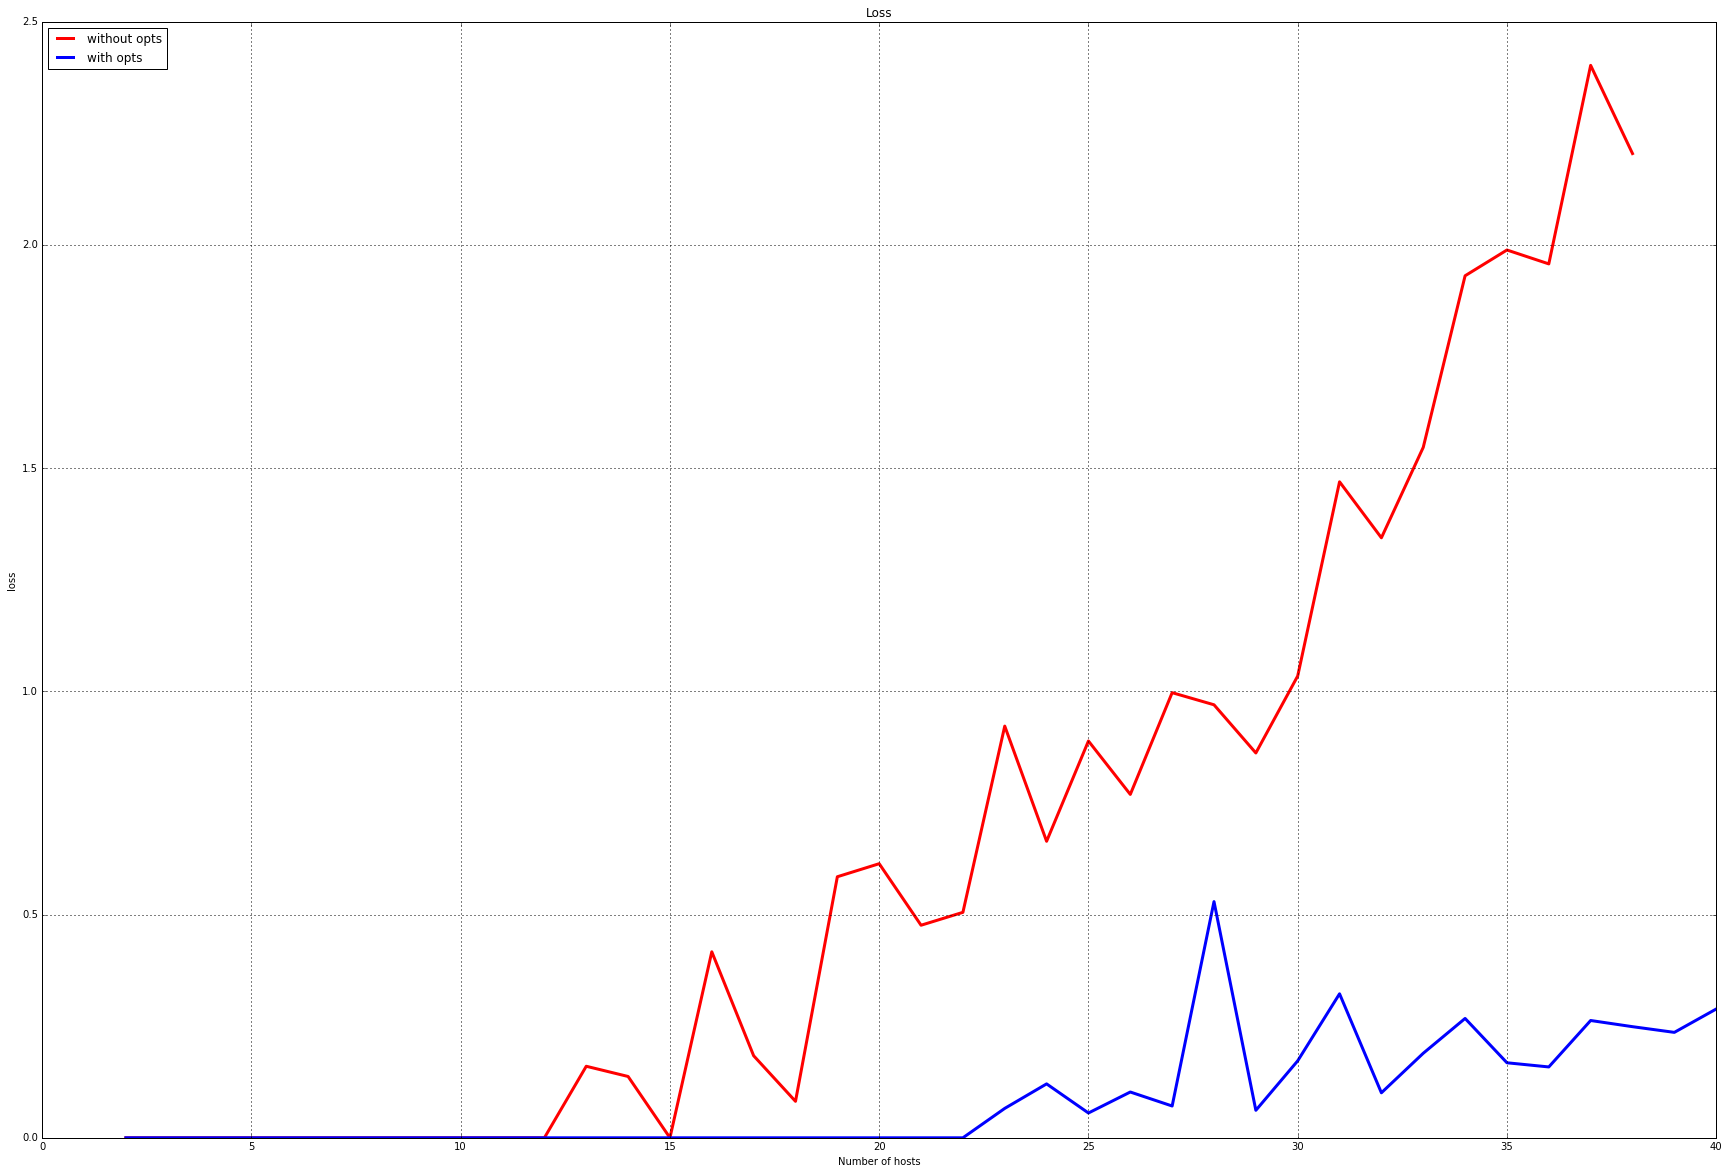

In [145]:
plt.figure(figsize=(30, 20))
plt.plot(n_old, loss_old, color='r', label="without opts", lw=3)
plt.plot(n_new, loss_new, color='b', label="with opts", lw=3)
plt.legend(loc='upper left')
plt.grid(linewidth=1)
plt.title("Loss")
plt.xlabel("Number of hosts")
plt.ylabel("loss")
plt.show()

In [92]:
tmp_n = n_old.get_values() - 1
y = log(pi_old)[2:]
x = log(tmp_n)[2:]
N = len(x)

a2_old = (N * sum(x * y) - sum(x) * sum(y)) / (N*sum(x * x) - sum(x) * sum(x))
b2_old = (sum(y) - a2_old * sum(x)) / N

print a2_old, b2_old
print exp(b2_old)

tmp_n = n_new.get_values() - 1
y = log(pi_new)[2:]
x = log(tmp_n)[2:]
N = len(x)

a2_new = (N * sum(x * y) - sum(x) * sum(y)) / (N*sum(x * x) - sum(x) * sum(x))
b2_new = (sum(y) - a2_new * sum(x)) / N

print a2_new, b2_new
print exp(b2_new)

2.90560305822 0.743380621808
2.10303307012
2.28628177483 0.827556643706
2.28772218546


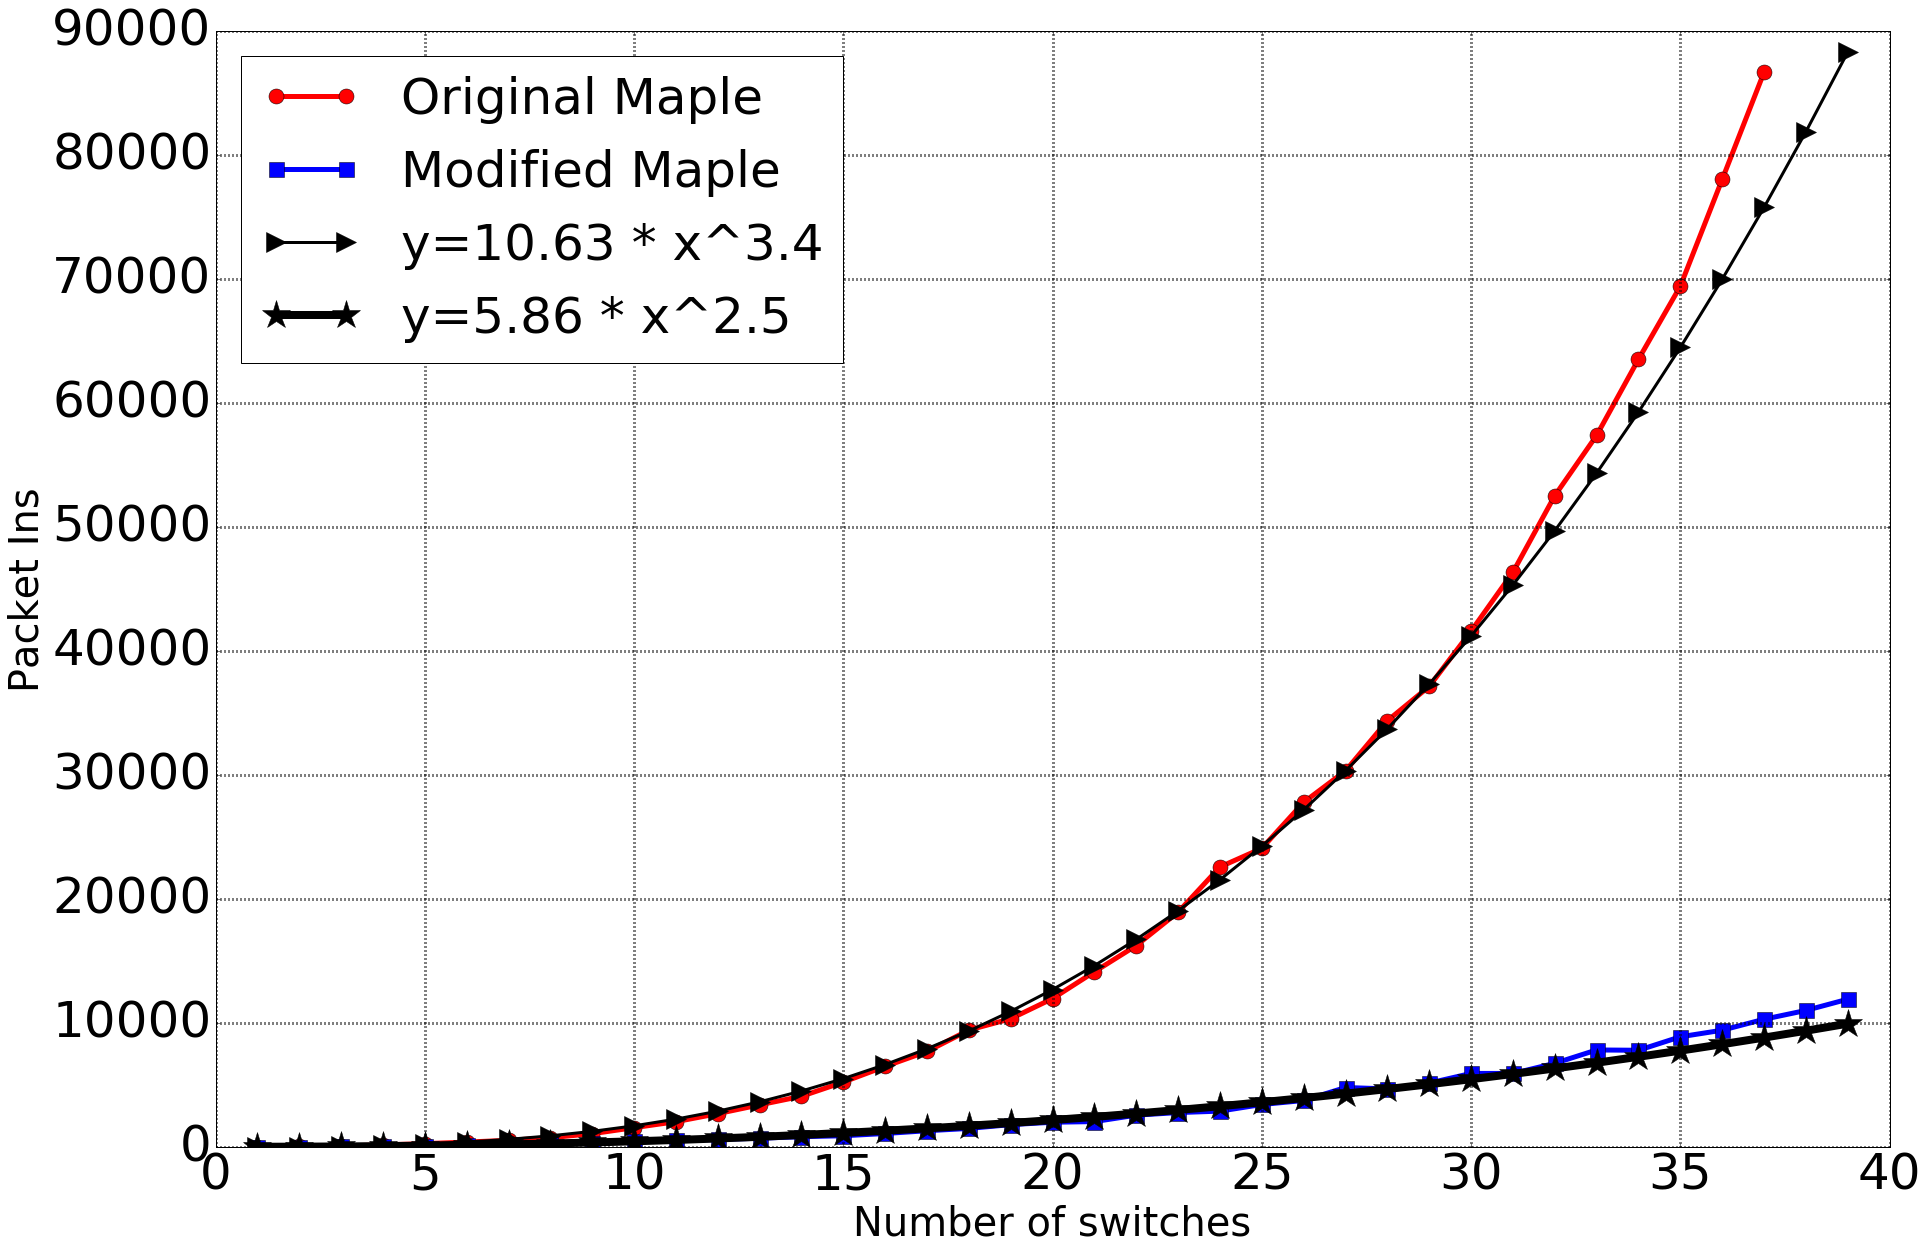

In [119]:
plt.figure(figsize=(30, 20))
plt.plot(n_old - 1, pi_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.plot(n_new - 1, pi_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.plot( range(1, 40), [ (x**a2_old)*exp(b2_old) for x in range(1, 40)], label="y=10.63 * x^3.4",color='black', lw=3, marker='>', markersize=20 )
plt.plot( range(1, 40), [ (x**a2_new)*exp(b2_new) for x in range(1, 40)], label='y=5.86 * x^2.5',color='black', lw=8, marker='*', markersize=30 )


plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=3)
#plt.title("PacketIn messages", fontsize=30)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Packet Ins", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('appPacketIn.png')
plt.show()

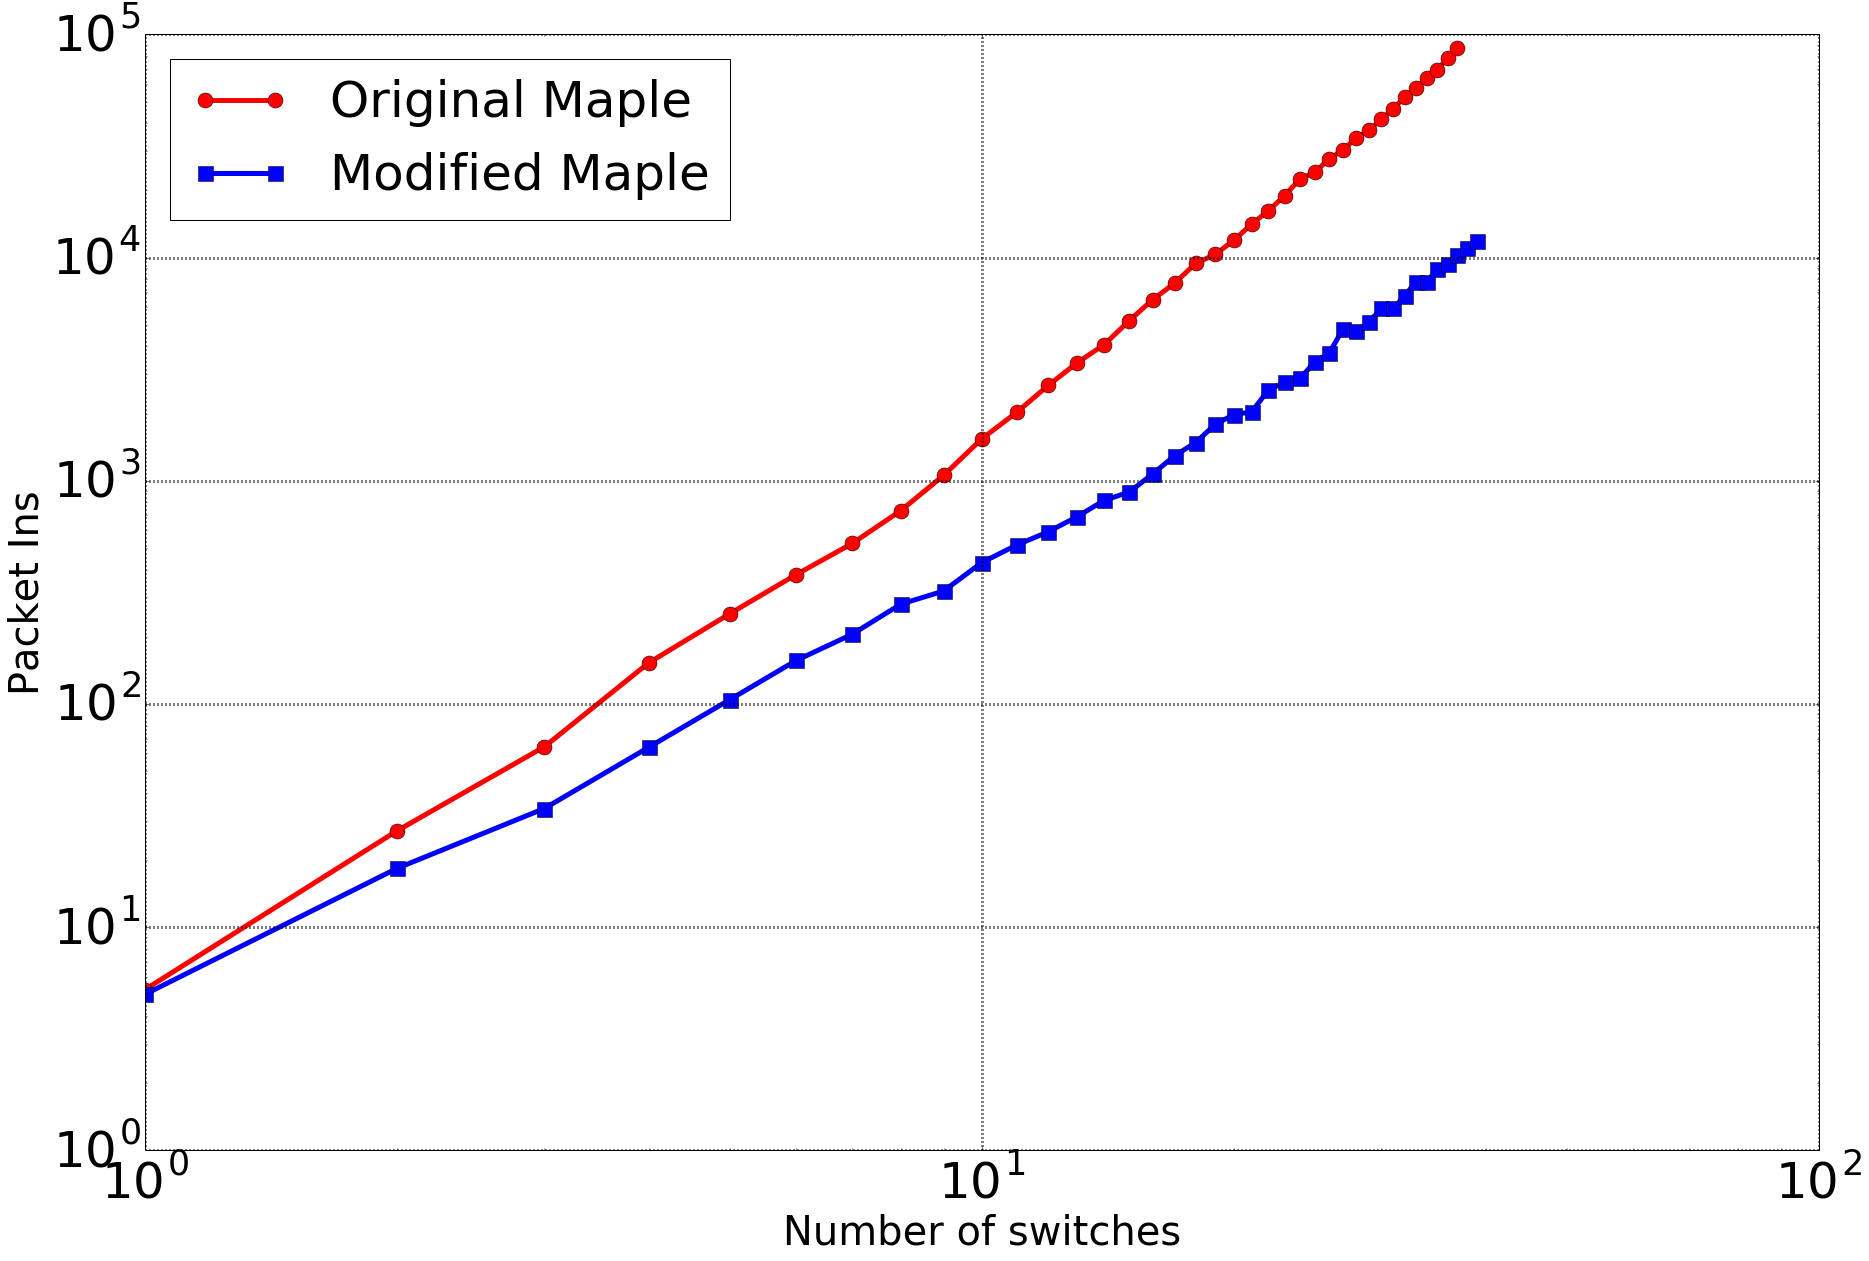

In [147]:
plt.figure(figsize=(30, 20))
plt.loglog(n_old - 1, pi_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.loglog(n_new - 1, pi_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=3)
#plt.title("PacketIn messages", fontsize=30)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Packet Ins", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('PacketInloglog.png')
plt.show()